# Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data

In [2]:
#Importing Libraries and visualizations:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Creating a path for easy Access:

path = r'C:\Users\Lenovo\Desktop\Career Foundry\28-06-2024 Instacart Basket Analysis - Saswata Biswas'

In [6]:
# Import latest data set from the 'Prepared Data' folder as a dataframe

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [8]:
# Checking the data
df.dtypes

order_id                     int32
user_id                      int32
order_number                  int8
orders_days_of_week           int8
order_hour_of_day             int8
days_since_prior_order     float16
product_id                   int32
add_to_cart_order            int16
reordered                     int8
product_name                object
aisle_id                     int16
department_id                 int8
prices                     float64
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                     int8
loyalty_flag                object
average_spend              float64
spender_flag                object
customer_frequency         float16
frequency_flag              object
first_name                  object
surname                     object
gender                      object
state                       object
age                          int16
date_joined         

### Q 03. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

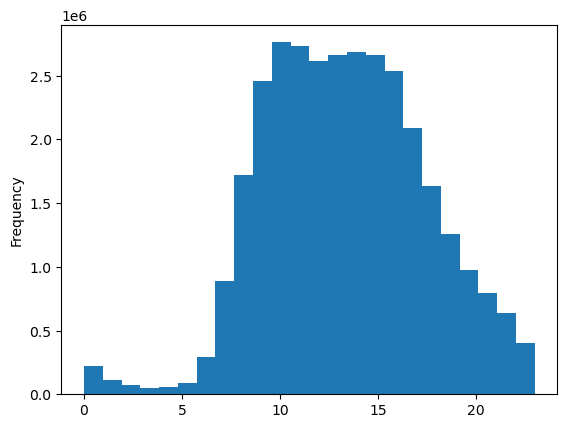

In [12]:
# creating histogram with 24 bins as there are 24 hours:
hist = df['order_hour_of_day'].plot.hist(bins = 24)

### The histogram above clearly shows that the busiest hours of the day are between 9 am and 4 pm. The online orders are minimal to none between midnight and 5 am. We can say that the customers order either during breaks or after work finishes. We might safely say that most of Instacart customer are asleep between midnight and 5 am

### 04. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

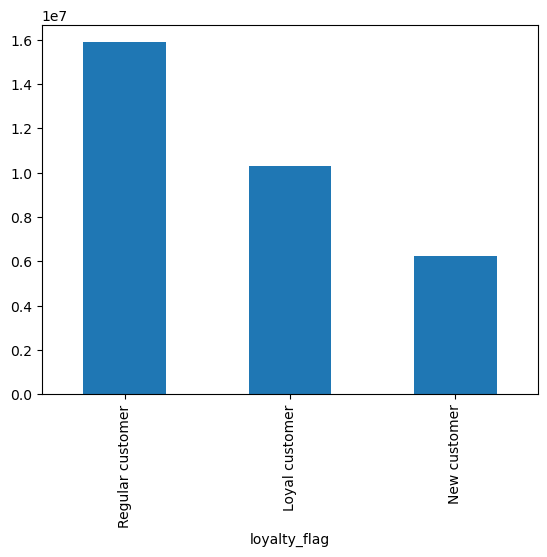

In [17]:
bar = df['loyalty_flag'].value_counts().plot.bar()

### Q 05: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 

In [21]:
# Create a random sample by generating a seed (50) as there are millions of rows)
np.random.seed(50)

In [23]:
# Create a dev list based on the data split we want (70/30)
dev = np.random.rand(len(df)) <= 0.7

In [25]:
# Split the dataframe into two samples
big = df[dev]
small = df[~dev]

#### Checking the lengths

In [28]:
len(df)

32404859

In [30]:
len(big)

22684953

In [32]:
len(small)

9719906

In [34]:
len(big) + len (small)

32404859

In [36]:
# Reduce the samples to only the columns needed
df2 = small [['order_hour_of_day','prices']]

In [38]:
df2.describe()

,order_hour_of_day,prices
count,9.719906e+06,9.719906e+06
mean,1.342513e+01,1.189285e+01
std,4.246400e+00,4.832797e+02
min,0.000000e+00,1.000000e+00
25%,1.000000e+01,4.200000e+00
50%,1.300000e+01,7.400000e+00
75%,1.600000e+01,1.130000e+01
max,2.300000e+01,9.999900e+04


In [40]:
#changing the display settings to have a better understanding:
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [42]:
df2.describe()

,order_hour_of_day,prices
count,9719906.00,9719906.00
mean,13.43,11.89
std,4.25,483.28
min,0.00,1.00
25%,10.00,4.20
50%,13.00,7.40
75%,16.00,11.30
max,23.00,99999.00


In [44]:
# Dropping the values that are skewing the data (as learnt in this exercise):

df2.loc[df2['prices'] > 100]

,order_hour_of_day,prices
1576,14,14900.00
1638,16,14900.00
127325,15,14900.00
128924,12,99999.00
136885,17,14900.00
...,...,...
32293900,10,14900.00
32298104,12,14900.00
32314605,12,14900.00
32320312,11,14900.00


In [46]:
df2.loc[df2['prices'] >100, 'prices'] = np.nan

In [48]:
df2.describe()

,order_hour_of_day,prices
count,9719906.00,9718354.00
mean,13.43,7.79
std,4.25,4.24
min,0.00,1.00
25%,10.00,4.20
50%,13.00,7.40
75%,16.00,11.30
max,23.00,25.00


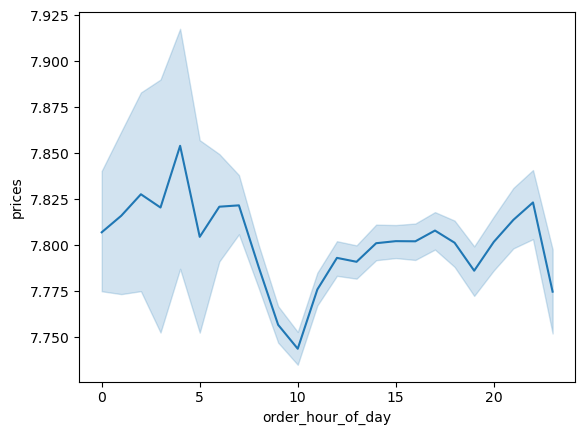

In [50]:
# Create a line chart
line = sns.lineplot(data = df2, x = 'order_hour_of_day',y = 'prices')

#### Took 8 minutes. So we need to be patient and make sure other apps are not running

### We can clearly say that the prices are lowest at 10 am and highest at 4 am

### Q 06. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [55]:
# Reduce previously made sample to only the columns needed
df3 = small [['age','n_dependants']]

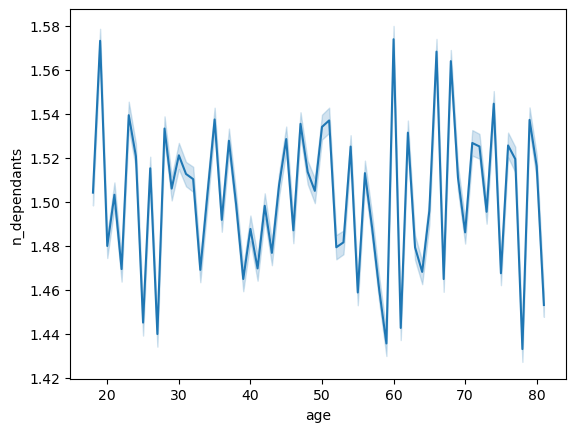

In [57]:
# Creating a line chart based on these columns:

line2 = sns.lineplot(data = df3, x = 'age',y = 'n_dependants')

### There are no distinct patterns in the chart to establish the difference or connection between age of customers and their number of dependants

### Q 07. You’ll also need to explore whether there’s a connection between age and spending power (income).

In [61]:
# Reduce previously made small sample to only the columns needed
df4 = small [['age','income']]

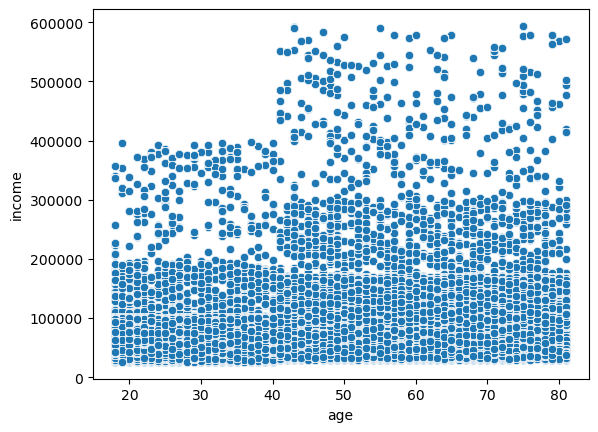

In [63]:
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = df4)

#### It is to be noted that there is a big gap between income groups. However, all we can say from this scatter plot is people below 40 earn less than people above 40. However, to delve deeper into the relation between age and income would require further analysis

### Q 08. Export your visualizations as “.png” files in your relevant project folder.

In [69]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day_frequency.png'))
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_distribution.png'))
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'change_in_price_over_hours_of_the_day.png'))
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_vs_n_dependants.png'))
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'change_in_spending_power_over_age.png'))